# Mini Project
*by Elvis, Darryl, Onolt, Sinuo & Hong En*

#### Here is the flowchart of our thought process at handling the problem

<img src="assets/flowchart.png" width="300" height="200">

#### Before we begin we first initialize some global varibles and importing of libraries.

In [2]:
import matplotlib.pyplot as plt
import csv

students = {}
result = []
ordered = []
group = {}
gpa = 'CGPA\n'
teamSize = 5
numberOfTeams = 10

#### First, we start by reading the **records.csv** file and convert the data into a dictionary that assigns **Student ID** to the student's information.

>this returns a `dictionary` that is stored in the varible `students`

>the varible `cols` stores the header while the varible `student` stores the student's information

In [3]:
# reading the 'records.csv' file and saving it as 'records'
with open('records.csv', 'r') as records:
    cols = []

    # iterate through each line in records and saving the student's information in a list called 'student'
    for line in records:
        student = line.split(',')

        # if statement to eliminate the header
        if student[2] == 'School':
            cols = student
            continue

        # appends the empty dictionary 'students' with every student's 'Student ID' stored as a key with its value as a empty dict
        students[student[1]] = {}
        
        ''' this is done as a separate algorithm of grouping for our plotting later on... '''
        ordered.append(student[1]) # Algorithm I

        # for loop to append the empty dict value with the student's information
        for i in range(len(student)):
            students[student[1]][cols[i]] = student[i]

        # now we have the dictionary 'students' with {Student ID: student's information}

#### Next, to help us in the grouping later on, we create dictionary that contains a list of Student IDs in each Tutorial Group.
 > this returns `group` which contains a dictionary of each Tutorial Group : Student IDs

In [4]:
for studentID, student in students.items(): 
    if student['Tutorial Group'] not in group: 
        group[student['Tutorial Group']] = []
    group[student['Tutorial Group']].append(studentID)

#### Next, as part of the criteria for a good diversity of gender, we created a function for it.
> `getGenderLimit()` calculates the ideal ratio of Males to Females in each assigned team

In [5]:
def getGenderLimit(tutGroup):
    global group
    maleNum = 0
    femaleNum = 0

    # calculate number of Males & Females in the Tutorial Group
    for a in group[tutGroup]:
        if students[a]['Gender'] == "Male":
            maleNum += 1
        else:
            femaleNum += 1

    # calculating ratio
    actualMaleNum = int(teamSize * maleNum / (femaleNum + maleNum))
    genderLimit = {
        'Male' : actualMaleNum,
        'Female' : teamSize - actualMaleNum
    }

    # returns the dictionary of the ratio
    return genderLimit

#### Additionally, as part of the criteria for a good diversity of Schools, we created a function for it.
> `getSchoolLimit()` limits the number of students from the same school when assigning the team

> if the number of students from the same school is too large, the function also allows a bypass by increasing the limit


In [6]:
def getSchoolLimit(tutGroup):
    global group
    schoolLimit = {}

    # counting the number of students from the each school in the Tutorial Group
    for student in group[tutGroup]: 
        if students[student]['School'] not in schoolLimit: 
            schoolLimit[students[student]['School']] = 0
        schoolLimit[students[student]['School']] += 1

    # calculating the limit
    for key, val in schoolLimit.items(): 
        schoolLimit[key] = (val + numberOfTeams - 1) // numberOfTeams
    return schoolLimit

#### Now, we create a function that assigns 5 students to each team based on the criterias we mentioned above.
> `grouping()` creates **10** empty lists which will be considered as teams

> we then allocate each individual into each team while taking into considerations of the requirements 

In [7]:
def grouping(tutGroup):
    global group, result

    # sort the student IDs according to their CGPA in a descending order
    group[tutGroup].sort(key = lambda x:-float(students[x][gpa]))

    # call the function getGenderLimit() to get the gender limit...
    genderLimit = getGenderLimit(tutGroup)

    # call the function getSchoolLimit() to get the school limit...
    schoolLimit = getSchoolLimit(tutGroup)

    # create the 10 empty lists (teams) and average to calculate the average gpa of each team assigned
    teams = [[] for i in range(numberOfTeams)]
    average = [0 for i in range(numberOfTeams)]

    ''' 
    this for loop iterates through each student ID and assigns them to each team from the highest gpa to lowest,
    at the same time, we take into account the current Gender count and School count to ensure that it does not exceed
    each Tutorial Group's respective Gender and School limit.
    '''
    
    for student in group[tutGroup]: 
        ids = [i for i in range(numberOfTeams)]
        ids.sort(key = lambda x:average[x])
        found = False
        minID = -1
        
        for i in ids: 
            if len(teams[i]) == teamSize:
                continue
            countSchool = 0
            countGender = 0
            for teamStudent in teams[i]: 
                if students[teamStudent]['School'] == students[student]['School']: 
                    countSchool += 1
                if students[teamStudent]['Gender'] == students[student]['Gender']: 
                    countGender += 1

            if countSchool < schoolLimit[students[student]['School']]:
                if minID == -1: 
                    minID = i
                if countGender < genderLimit[students[student]['Gender']]: 
                    teams[i].append(student)
                    average[i] += float(students[student][gpa]) / teamSize
                    found = True
                    break
                    
        # if our current student assigned exceeds the limit in every team, we will assign them to the team with the lowest average GPA
        if found is not True: 
            if minID == -1:
                for i in range(numberOfTeams):
                    if len(teams[i]) < teamSize:
                        minID = i
            teams[minID].append(student)
            average[minID] += float(students[student][gpa]) / teamSize
            
    # returns a nested list
    return teams

#### With our `grouping()` function, we can now group each **Student ID** into their respective teams

> this results in 10 lists created for each Tutorial Group containing Student IDs

> this 10 lists will be our **team assigned**

#### At this stage, we further develop 3 functions to interswap the team members to get a better diversity
> `getAverage()` returns the average GPA of the current team

> `getSchoolDiversity()` returns the number of unique schools in the team

> `getGenderDiversity()` returns the highest number of students with the same gender

In [8]:
def getAverage(team):
    result = 0
    for student in team: 
        result += float(students[student][gpa]) / teamSize
    return result

def getSchoolDiversity(team):
    schoolCount = {}
    for student in team: 
        if students[student]['School'] not in schoolCount: 
            schoolCount[students[student]['School']] = 0
        schoolCount[students[student]['School']] += 1
    return len(schoolCount)

def getGenderDiversity(team): 
    maleNum = 0
    femaleNum = 0
    for student in team:
        if students[student]['Gender'] == "Male":
            maleNum += 1
        else:
            femaleNum += 1
    return max(maleNum, femaleNum)

#### Now, we create a function that utilises the previous 3 functions created
> `trySwapping()` better optimizes the diversity of each team by swapping students from every team

> the function helps to ensure Gender and School diversity while maintaining a similar average GPA between the teams

In [9]:
def trySwapping(teams):
    teams.sort(key=lambda x: getAverage(x))
    teamsSize = len(teams)

    # by iterating through the teams, we minimize the variance of GPA, Gender and School
    for i in range(teamsSize):
        for j in range(teamsSize - 1, i, -1):
            teamA = teams[i]
            teamA.sort(key=lambda x: float(students[x][gpa]))
            teamB = teams[j]
            teamB.sort(key=lambda x: float(students[x][gpa]))
            
            maxAverage = max(getAverage(teamA), getAverage(teamB))
            genderDiversity = getGenderDiversity(teamA) + getGenderDiversity(teamB)
            schoolDiversity = getSchoolDiversity(teamA) + getSchoolDiversity(teamB)

            # we attempt to swap students between teams to get the 'best' swapped teams
            # the 'best' swapped teams is decided based on the diversity functions
            bestA, bestB = None, None
            
            for ii in range(len(teamA)):
                for jj in range(len(teamB) - 1, -1, -1):
                    tmpA = teamA[:]
                    tmpB = teamB[:]
                    tmpA[ii], tmpB[jj] = tmpB[jj], tmpA[ii]
                    
                    maxAverage_ = max(getAverage(tmpA), getAverage(tmpB))
                    genderDiversity_ = getGenderDiversity(tmpA) + getGenderDiversity(tmpB)
                    schoolDiversity_ = getSchoolDiversity(tmpA) + getSchoolDiversity(tmpB)

                    # only updates the best team when ideal diversity is reached
                    if maxAverage_ < maxAverage and genderDiversity_ <= genderDiversity and schoolDiversity_ >= schoolDiversity:
                        bestA, bestB = tmpA, tmpB
                        maxAverage = maxAverage_
                        genderDiversity = genderDiversity_
                        schoolDiversity = schoolDiversity_
                        
            # assign the new teams accordingly
            if bestA and bestB:
                teams[i] = bestA
                teams[j] = bestB

    return teams

#### Lastly, we call our functions together to create the ten teams for each tutorial group
> with this, we have "assigned" each Student to a team of 5 in each Tutorial Group


In [10]:
for key in group.keys(): 
    teams = grouping(key)
    teams = trySwapping(teams)
    for i in range(numberOfTeams):
        result.append(teams[i])

#### We proceed with writing back the teams assigned into a .csv file as our output
> this also includes the team assigned number for each team we created previously

In [11]:
with open('FCSH_Team3_Onolt.csv', 'w', newline = '') as file:
    writer = csv.writer(file)
    cols = ['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA', 'Team Assigned']
    writer.writerow(cols)
    i = 0
    for team in result: 
        i += 1
        for student in team: 
            printerList = []
            for col in cols: 
                if col == 'CGPA': 
                    printerList.append(float(students[student][gpa]))
                elif col == 'Team Assigned': 
                    printerList.append(i)
                else:
                    printerList.append(students[student][col])
            writer.writerow(printerList)

#### Moving forth, we will now illustrate certain graphs to showcase how diverse we have allocated the teams
> the below 2 graphs illustrates how our algorithm results in a **smaller variance** in **average GPA** across teams

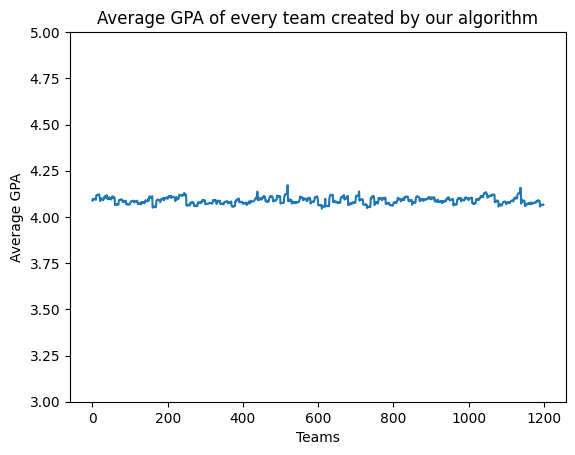

In [12]:
plotX = [i for i in range(len(result))]
plotY = []

for team in result:
    plotY.append(getAverage(team))
plt.title("Average GPA of every team created by our algorithm")
plt.xlabel("Teams")
plt.ylabel("Average GPA")
plt.plot(plotX, plotY)
plt.ylim(3, 5)
plt.show()

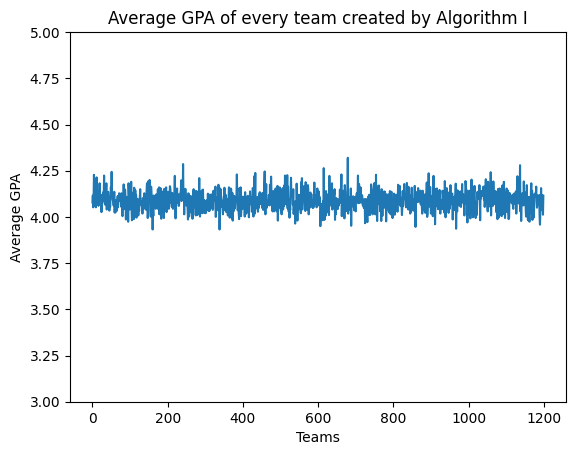

In [13]:
plotX = [i for i in range(len(result))]
plotY = []

# the for loops assigns the students into teams based on 'Algorithm I'
for i in range(0, len(ordered), teamSize):
    average = 0
    for j in range(i, i + teamSize):
        average += float(students[ordered[j]][gpa]) / teamSize
    plotY.append(average)

plt.title("Average GPA of every team created by Algorithm I")
plt.xlabel("Teams")
plt.ylabel("Average GPA")
plt.plot(plotX, plotY)
plt.ylim(3, 5)
plt.show()

#### To showcase our gender diversity, the code below illustrates two graphs: Pie Chart & Bar Graph
> The `Pie Chart` and `Bar Graph` showcases the gender distribution of the teams designed by our Algorithm

> Majority of the groups has a **prevailing gender count** of **3**

> Only a small amount `5.3%` and `0.2%` of teams have a prevailing gender count of **4** or more respectively

> A **prevailing gender count** signifies that the gender ratio of a team is `3:2` , `4:1` and `5:0` respectively 

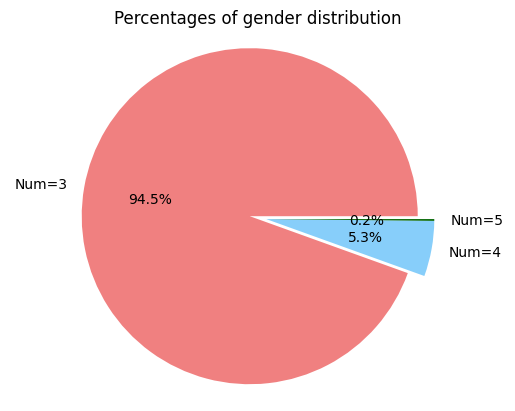

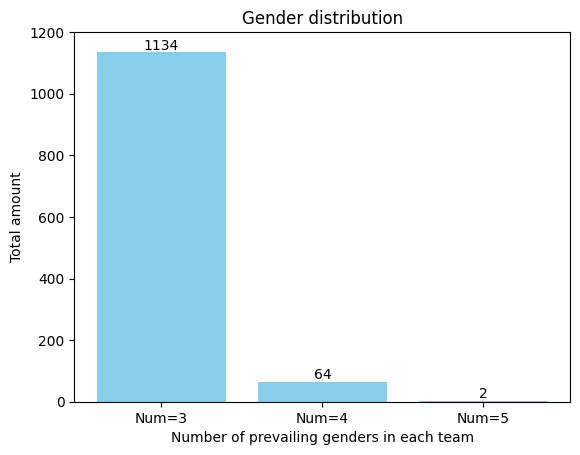

In [14]:
genderCount3 = 0
genderCount4 = 0
genderCount5 = 0

# iterate through the results and calculate the prevailing gender in each team
for team in result:
    prevailingGenderNum = getGenderDiversity(team)
    if prevailingGenderNum == 3:
        genderCount3 += 1
    elif prevailingGenderNum == 4:
        genderCount4 += 1
    elif prevailingGenderNum == 5:
        genderCount5 += 1
        
# pie chart of gender distribution
labels = ["Num=3", "Num=4","Num=5"]
sizes = [genderCount3, genderCount4, genderCount5]
colors = ["lightcoral","lightskyblue","darkgreen" ]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode,labels=labels, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentages of gender distribution')
plt.show()

# bar chart of gender distribution
categories = ["Num=3", "Num=4","Num=5"]
values = [genderCount3,genderCount4,genderCount5]
bars = plt.bar(categories, values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        yval,
        ha='center',
        va='bottom'
    )

plt.title('Gender distribution')
plt.xlabel('Number of prevailing genders in each team')
plt.ylabel('Total amount')
plt.ylim(0, 1200)
plt.show()

#### By comparing the gender diversity of our Algorithm to Algorithm I
> We have illustrated two more graphs below to showcase the significant difference

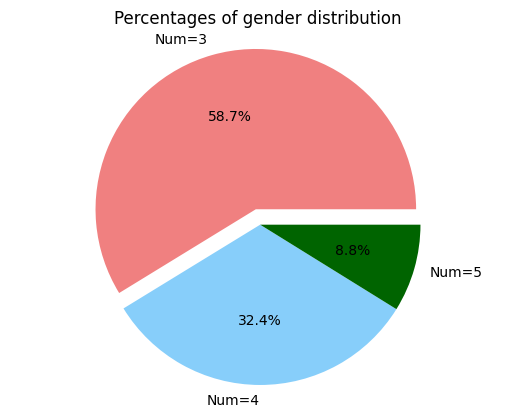

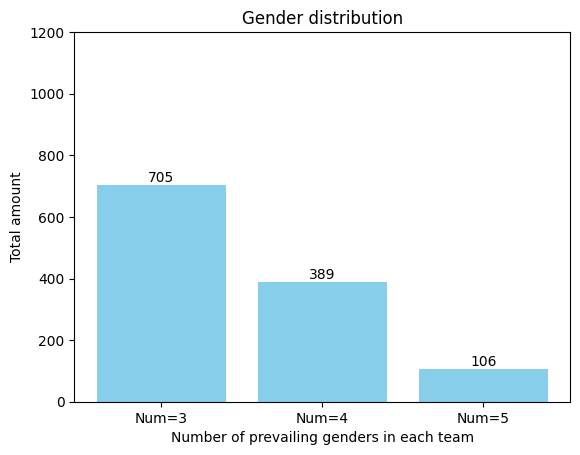

In [15]:
genderCount3 = 0
genderCount4 = 0
genderCount5 = 0

for i in range(0, len(ordered), 5):
    team = []
    for j in range(i, i + 5):
        team.append(ordered[j])
    prevailingGenderNum = getGenderDiversity(team)
    if prevailingGenderNum == 3:
        genderCount3 += 1
    elif prevailingGenderNum == 4:
        genderCount4 += 1
    elif prevailingGenderNum == 5:
        genderCount5 += 1
        
# pie chart of gender distribution
labels = ["Num=3", "Num=4","Num=5"]
sizes = [genderCount3, genderCount4, genderCount5]
colors = ["lightcoral","lightskyblue","darkgreen" ]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode,labels=labels, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentages of gender distribution')
plt.show()

# bar chart of gender distribution
categories = ["Num=3", "Num=4","Num=5"]
values = [genderCount3,genderCount4,genderCount5]
bars = plt.bar(categories, values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        yval,
        ha='center',
        va='bottom'
    )

plt.title('Gender distribution')
plt.xlabel('Number of prevailing genders in each team')
plt.ylabel('Total amount')
plt.ylim(0, 1200)
plt.show()

#### Lastly, to showcase the diversity of the distribution of schools based on our algorithm
> The `Bar Graph` below shows that majority of the teams have students from **5** different schools

> We have a total of `93.8%` of teams having a diversity count of 5 and only `5.8%` of teams having a diversity count of 4

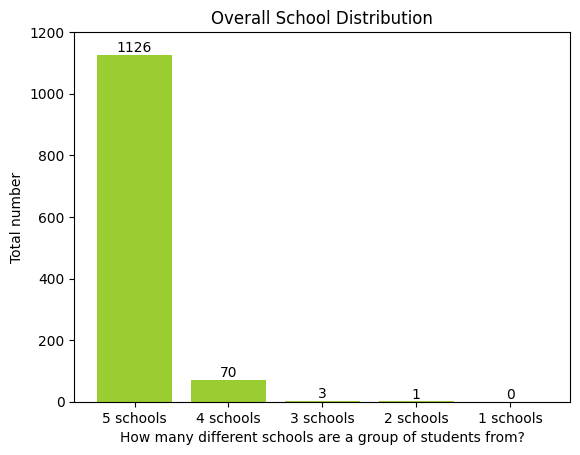

In [16]:
'''
Below is the calculation of the total number of each school variance.
if all 5 people in a group comes from different schools, then the variance is 5
'''
school_count5 = 0 
school_count4 = 0
school_count3 = 0
school_count2 = 0
school_count1 = 0

for team in result:
    school_count = getSchoolDiversity(team)
    
    # calculates the total number of each variance
    if school_count == 5:
        school_count5 += 1
    elif school_count == 4:
        school_count4 += 1
    elif school_count == 3:
        school_count3 += 1
    elif school_count == 2:
        school_count2 += 1
    elif school_count == 1:
        school_count1 += 1


# creating a bar graph using the data calculated above
categories2 = ["5 schools", "4 schools", "3 schools", "2 schools", "1 schools"]
values2 = [school_count5, school_count4,school_count3,school_count2,school_count1]
bars2 = plt.bar(categories2, values2, color='yellowgreen')
for bar in bars2:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        yval,
        ha='center',
        va='bottom'
    )
plt.title('Overall School Distribution')
plt.xlabel('How many different schools are a group of students from?')
plt.ylabel('Total number')
plt.ylim(0, 1200)
plt.show()

#### Similarly to what we have done above, we illustrate the school distribution of the teams based on Algorithm I
> Again, a **significant difference** between the our algorithm and Algorithm I

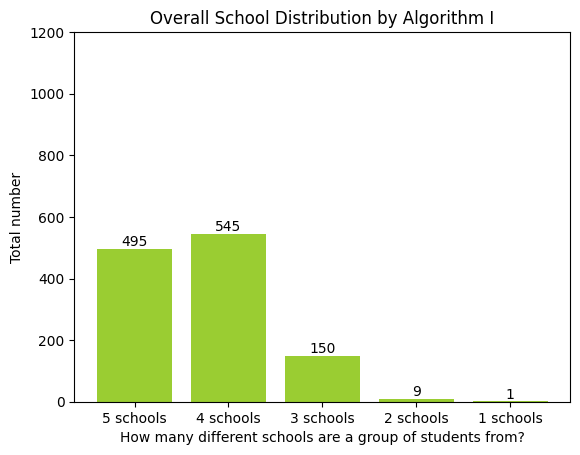

In [17]:
'''
Below is the calculation of the total number of each school variance.
if all 5 people in a group comes from different schools, then the variance is 5
'''
school_count5 = 0 
school_count4 = 0
school_count3 = 0
school_count2 = 0
school_count1 = 0


for index2 in range(0,6000, 5):      
    selectedResults2 = []
    
    # assigning the teams based on Algorithm I
    for i in range(index2, index2 + 5):
        selectedResults2.append(ordered[i])

    school_count = getSchoolDiversity(selectedResults2)
    
    # calculates the total number of each variance
    if school_count == 5:
        school_count5 += 1
    elif school_count == 4:
        school_count4 += 1
    elif school_count == 3:
        school_count3 += 1
    elif school_count == 2:
        school_count2 += 1
    elif school_count == 1:
        school_count1 += 1


# creating a bar graph using the data calculated above
categories2 = ["5 schools", "4 schools", "3 schools", "2 schools", "1 schools"]
values2 = [school_count5, school_count4,school_count3,school_count2,school_count1]
bars2 = plt.bar(categories2, values2, color='yellowgreen')
for bar in bars2:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        yval,
        ha='center',
        va='bottom'
    )
plt.title('Overall School Distribution by Algorithm I')
plt.xlabel('How many different schools are a group of students from?')
plt.ylabel('Total number')
plt.ylim(0, 1200)
plt.show()

# Thank You !

<img src="assets/ai_declaration.pdf" width="1000" height="200">